In [ ]:
import pickle as pkl
import numpy as np

from src.models.train_emos import train_emos, train_and_test_emos
from src.visualization.pit import make_cpit_diagram_emos, make_cpit_hist_emos 
from src.visualization.brier_score import brier_skill_plot, brier_plot
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS
from src.visualization.scoring_tables import make_table
from src.visualization.twcrpss_plot import make_twcrpss_plot
from src.models.emos import EMOS
from src.visualization.reliability_diagram import make_reliability_diagram
from src.training.training import load_model

In [ ]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/emos/'

base_model = load_model(folder + 'trunc_normal/tn_crps_.pkl')
print(base_model)

In [3]:
test_fold = 3
ignore = ['229', '285', '323']
X_test, y_test, variances_test = get_tensors(base_model.neighbourhood_size, base_model.feature_names, test_fold, ignore)
X_test = (X_test - base_model.feature_mean) / base_model.feature_std

print(X_test.shape)

(7780, 5)


In [9]:
frechet_folder = folder + 'frechet/'

frechet = load_model(frechet_folder + 'frechet_crps_.pkl')

t12 = load_model(frechet_folder + 'frechet_twcrps_threshold12.0.pkl')
t15 = load_model(frechet_folder + 'frechet_twcrps_threshold15.0.pkl')

mean16_std4 = load_model(frechet_folder + 'frechet_twcrps_mean16.0_std4.0.pkl')
mean12_std1 = load_model(frechet_folder + 'frechet_twcrps_mean12.0_std1.0.pkl')
mean12_std4 = load_model(frechet_folder + 'frechet_twcrps_mean12.0_std4.0.pkl')
mean15_std1 = load_model(frechet_folder + 'frechet_twcrps_mean15.0_std1.0.pkl')

t_models = {'t12':t12, 't15':t15}
cdf_models = {'mean16_std4':mean16_std4, 'mean12_std1':mean12_std1, 'mean12_std4':mean12_std4, 'mean15_std1':mean15_std1}
frechet_model = {'frechet':frechet}

all_models = {**t_models, **cdf_models, **frechet_model}

Using given parameters for Frechet distribution
Using given parameters for Frechet distribution
Using given parameters for Frechet distribution
Using given parameters for Frechet distribution
Using given parameters for Frechet distribution
Using given parameters for Frechet distribution
Using given parameters for Frechet distribution


In [10]:
samples = 2000

print('Base model CRPS: ', base_model.loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())
for model in all_models:
    print(model, 'CRPS: ', all_models[model].loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())

Base model CRPS:  0.8908256
t12 CRPS:  1.2901574
t15 CRPS:  1.4093677
mean16_std4 CRPS:  0.9424891
mean12_std1 CRPS:  1.1692492
mean12_std4 CRPS:  0.9056306
mean15_std1 CRPS:  1.3595258
frechet CRPS:  0.8991538


There are 848 values in the PIT diagram


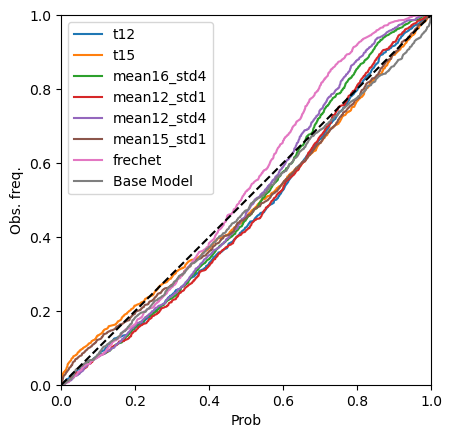

In [14]:
t = 10
make_cpit_diagram_emos(all_models, X_test, y_test, variances_test, t=t, base_model=base_model)

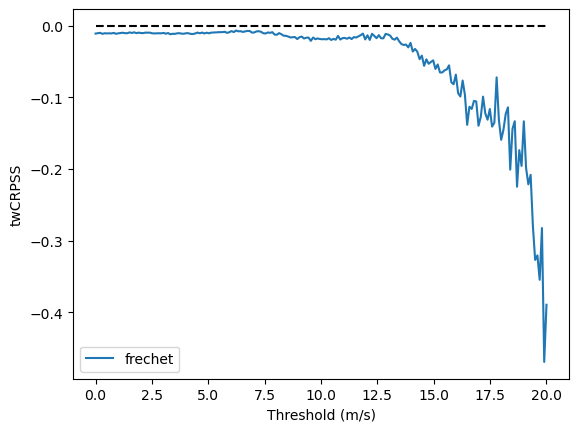

In [15]:
x_values = np.linspace(0, 20, 200)
make_twcrpss_plot(base_model, frechet_model, X_test, y_test, variances_test, x_values, sample_size=2000)

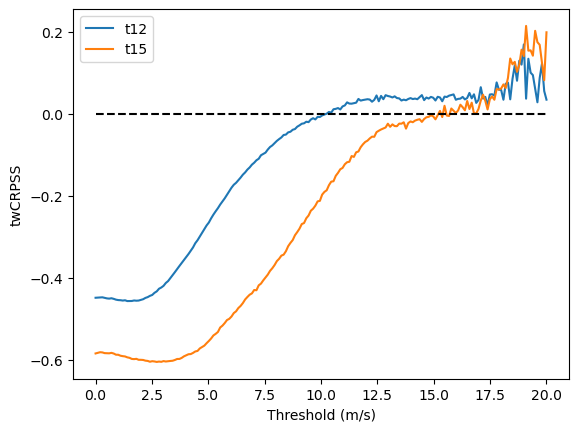

In [16]:
make_twcrpss_plot(base_model, t_models, X_test, y_test, variances_test, x_values, sample_size=1000)

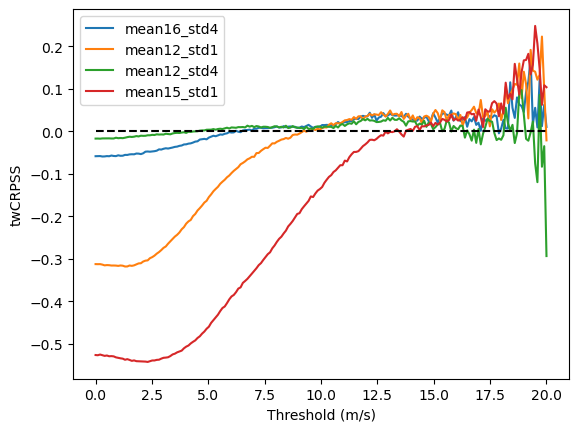

In [17]:
make_twcrpss_plot(base_model, cdf_models, X_test, y_test, variances_test, x_values, sample_size=1000)